## House Price Prediction for King County, USA

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pylab import rcParams

In [225]:
%matplotlib inline
rcParams['figure.figsize'] = 5,3
rcParams["legend.fontsize"] = 8

warnings.filterwarnings("ignore")

### Importing and Transforming Dataset

The information used in the dataset was obtained from <a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction">House Sales in King County, USA</a> in Kaggle, which contains records of homes that were sold between May 2014 and May 2015 [<a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885">link for field definition</a>]

In [226]:
kc_house_df = pd.read_csv('./Datasets/King County US House Data.csv')

print(f'No. of records: {kc_house_df.shape[0]}')
kc_house_df.head(5)

No. of records: 21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [227]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Exclude any columns that are not required for analysis

In [228]:
kc_house_df_filtered = kc_house_df.drop(['id', 'date', 'zipcode'], axis=1)
kc_house_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

Check if there are missing values

In [229]:
kc_house_df_filtered.isna().sum().sort_values(ascending=False)

price            0
bedrooms         0
sqft_living15    0
long             0
lat              0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
sqft_lot15       0
dtype: int64

The house's age can be determined by subtracting its `yr_built` from `2023`. However, if the house underwent renovation, then its age will be calculated by subtracting its `yr_renovated` from `2023`.

In [230]:
current_year = 2023
kc_house_df_filtered['house_age'] = np.where(kc_house_df_filtered['yr_renovated'] == 0, current_year - kc_house_df_filtered['yr_built'], current_year - kc_house_df_filtered['yr_renovated'])

kc_house_df_filtered = kc_house_df_filtered.drop(['yr_renovated', 'yr_built'], axis=1)

print(f'No. of records: {kc_house_df_filtered.shape[0]}')
kc_house_df_filtered.head(5)

No. of records: 21613


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
0,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,47.6298,-122.323,3940,8800,36
1,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,47.6500,-122.214,3930,25449,22
2,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,47.6305,-122.240,4540,42730,22
3,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,47.6289,-122.233,3560,24345,22
4,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,47.6232,-122.220,4600,21750,14


### Exploratory Data Analysis

View summary statistics of the numerical dataset

In [231]:
print(f'No. of records: {kc_house_df_filtered.shape[0]}')
kc_house_df_filtered.describe().apply(lambda s: s.apply('{0:.2f}'.format))

No. of records: 21613


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,47.56,-122.21,1986.55,12768.46,49.61
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,0.14,0.14,685.39,27304.18,28.81
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,47.16,-122.52,399.00,651.00,8.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,47.47,-122.33,1490.00,5100.00,24.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,47.57,-122.23,1840.00,7620.00,46.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,47.68,-122.12,2360.00,10083.00,69.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,47.78,-121.31,6210.00,871200.00,123.00


Examine the distribution of the house parts columns (`bedrooms`, `bathrooms`, `flooors` and `waterfront`) in the dataset.
- Remove any data points that are considered outliers
- Adjust values of the groupings

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

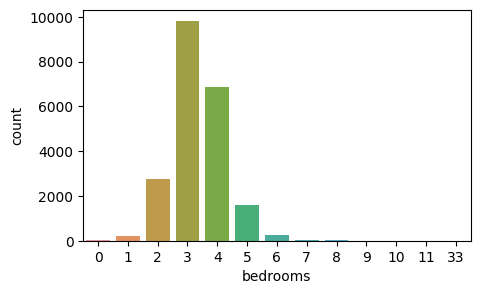

In [232]:
sns.countplot(data=kc_house_df_filtered, x='bedrooms')

In [233]:
# Remove the outlier from the `bedrooms`
kc_house_df_filtered = kc_house_df_filtered.query('bedrooms <= 11')
kc_house_df_filtered['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

<AxesSubplot: xlabel='bathrooms', ylabel='count'>

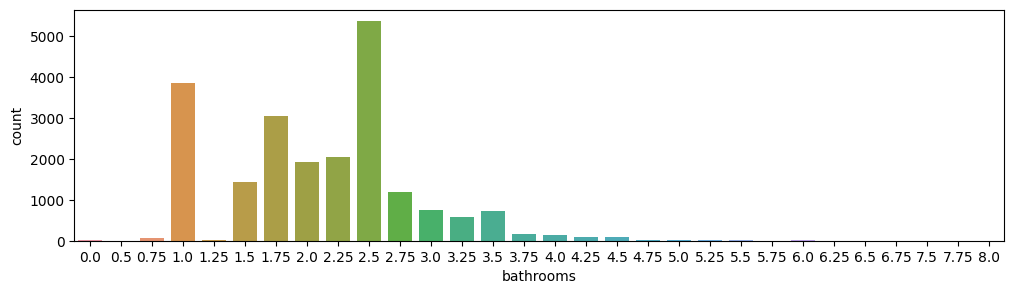

In [234]:
plt.figure(figsize = (12,3))
sns.countplot(data=kc_house_df_filtered, x='bathrooms')

<AxesSubplot: xlabel='floors', ylabel='count'>

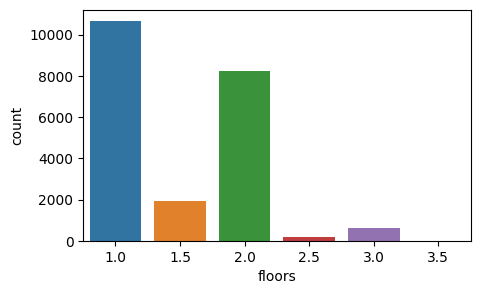

In [236]:
sns.countplot(data=kc_house_df_filtered, x='floors')

<AxesSubplot: xlabel='waterfront', ylabel='count'>

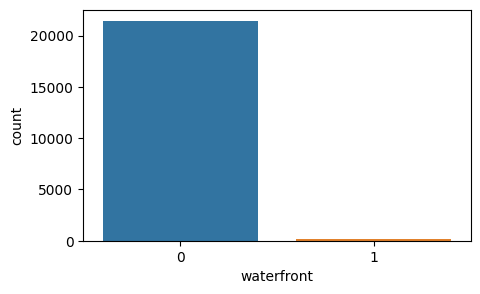

In [238]:
sns.countplot(data=kc_house_df_filtered, x='waterfront')

In [239]:
# Remove all records with 0 bedroom or 0 bathroom
print(f'No. of records (before): {kc_house_df_filtered.shape[0]}')
kc_house_df_filtered = kc_house_df_filtered.query('bedrooms > 0 or bathrooms > 0')
print(f'No. of records (after): {kc_house_df_filtered.shape[0]}')

No. of records (before): 21612
No. of records (after): 21605


Check the relationship between two variables

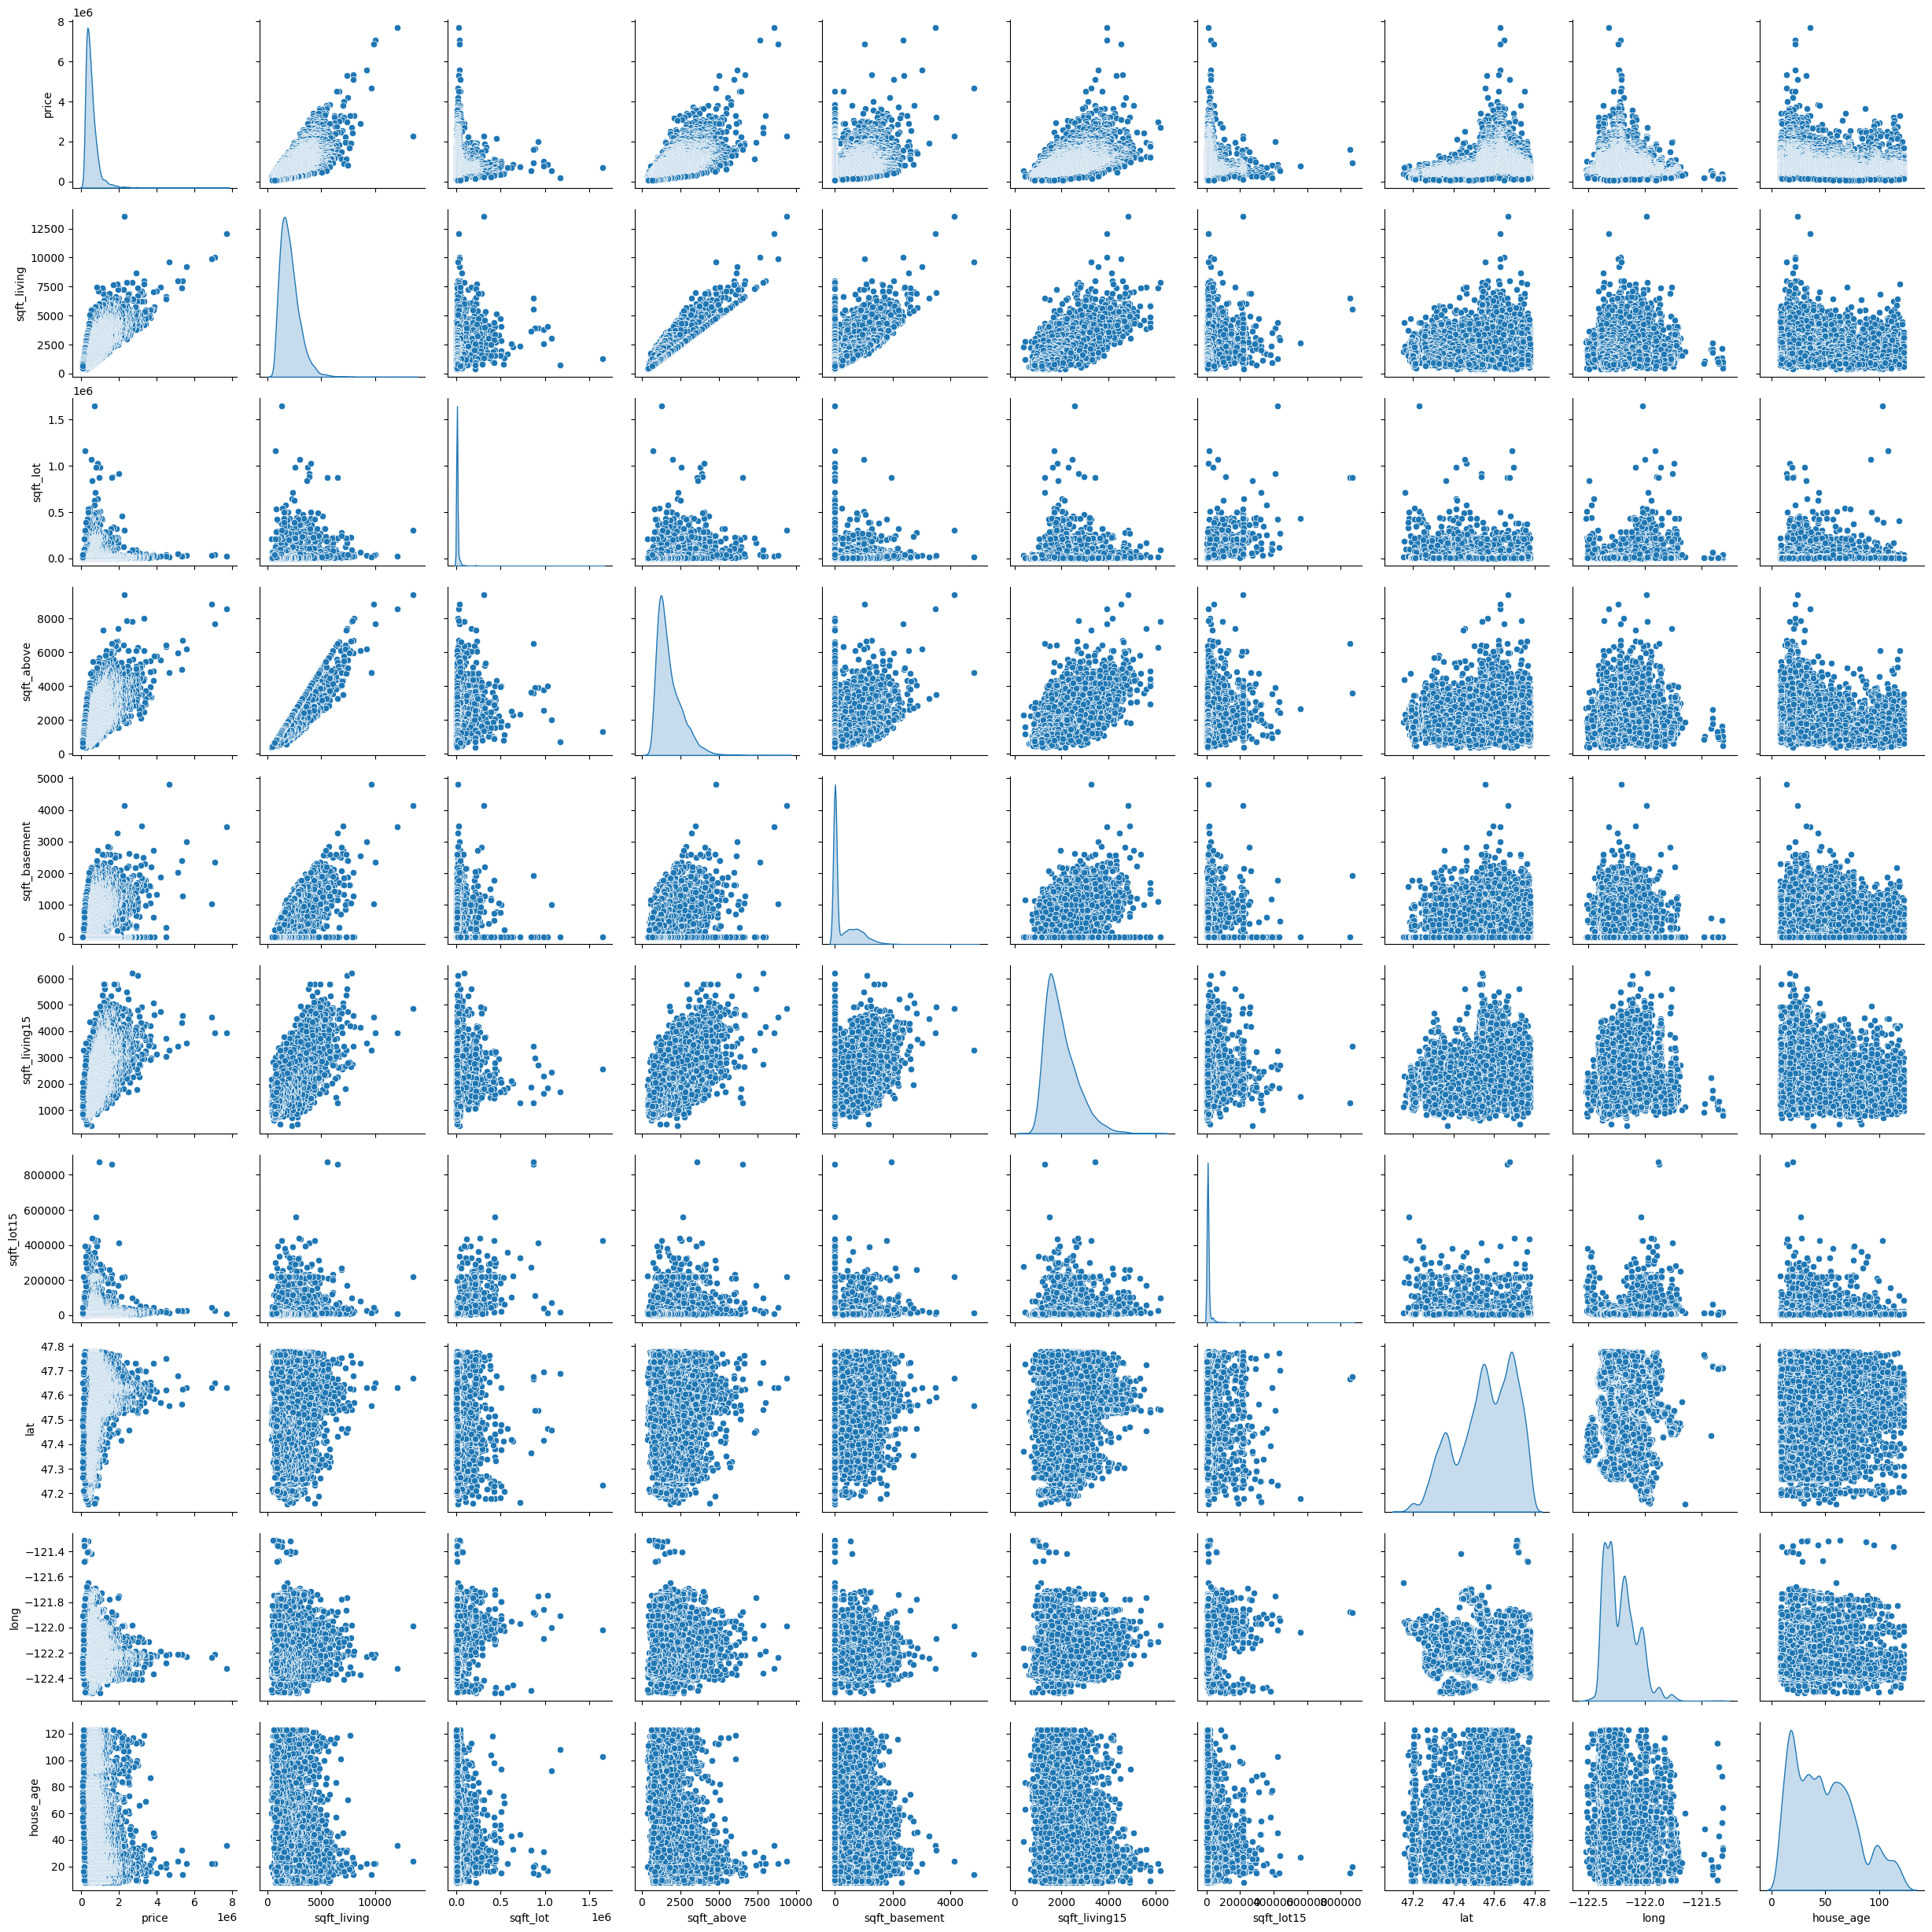

In [240]:
sns.pairplot(data=kc_house_df_filtered[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'house_age']], diag_kind='kde')

Use Pearson method to see correlation between numeric variables

- R = 1 : Strong positive relationship
- R = 0 : Not linearly correlated
- R =-1 : Strong negative relationship

Text(0.5, 1.0, 'Pearson Correlation Matrix')

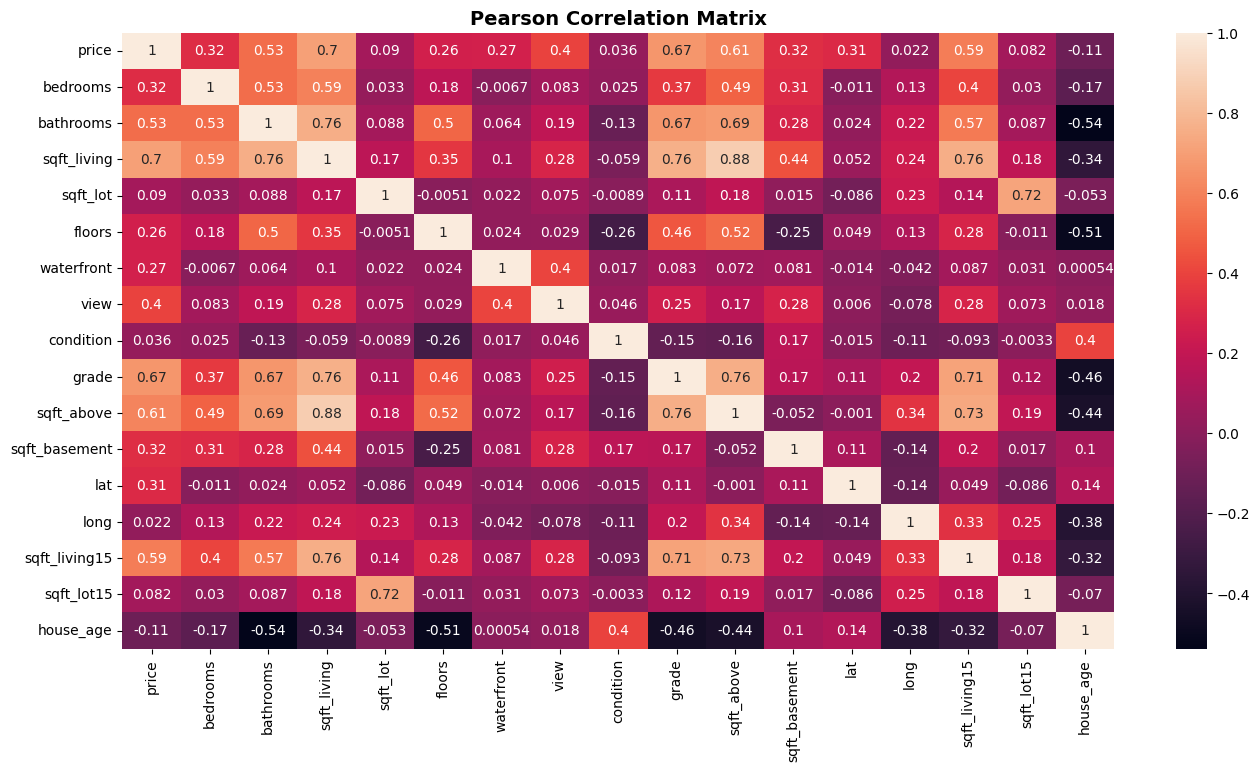

In [241]:
pearsoncorr = kc_house_df_filtered.corr(method='pearson')

plt.figure(figsize = (16, 8))
sns.heatmap(kc_house_df_filtered.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            annot=True)
plt.title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')

View summary statistics of numerical features and table information

In [242]:
print(f'No. of records: {kc_house_df_filtered.shape[0]}')
kc_house_df_filtered.describe().apply(lambda s: s.apply('{0:.2f}'.format))

No. of records: 21605


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age
count,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00,21605.00
mean,540089.91,3.37,2.12,2079.93,15108.96,1.49,0.01,0.23,3.41,7.66,1788.34,291.59,47.56,-122.21,1986.53,12768.89,49.61
std,367109.41,0.91,0.77,918.25,41427.70,0.54,0.09,0.77,0.65,1.17,827.82,442.62,0.14,0.14,685.18,27308.44,28.81
min,75000.00,0.00,0.00,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,47.16,-122.52,399.00,651.00,8.00
25%,322000.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,47.47,-122.33,1490.00,5100.00,24.00
50%,450000.00,3.00,2.25,1910.00,7620.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,47.57,-122.23,1840.00,7620.00,46.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,47.68,-122.12,2360.00,10083.00,69.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,47.78,-121.31,6210.00,871200.00,123.00


In [243]:
kc_house_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21605 non-null  float64
 1   bedrooms       21605 non-null  int64  
 2   bathrooms      21605 non-null  float64
 3   sqft_living    21605 non-null  int64  
 4   sqft_lot       21605 non-null  int64  
 5   floors         21605 non-null  float64
 6   waterfront     21605 non-null  int64  
 7   view           21605 non-null  int64  
 8   condition      21605 non-null  int64  
 9   grade          21605 non-null  int64  
 10  sqft_above     21605 non-null  int64  
 11  sqft_basement  21605 non-null  int64  
 12  lat            21605 non-null  float64
 13  long           21605 non-null  float64
 14  sqft_living15  21605 non-null  int64  
 15  sqft_lot15     21605 non-null  int64  
 16  house_age      21605 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 3.0 MB


__Observations/Assumptions:__
- There are independent variables that show no linear relationship with the dependent variable, which is the house price.
- We detected an outlier in the dataset with a bedroom count of 33, and removed it from the analysis.
- There are some houses with 0 bathroom and/or bedroom, which doesn't make sense. Hence, we decided to exclude them from the dataset.

### Splitting Data into Training and Test Set

In [244]:
X_features = kc_house_df_filtered.drop(['price'], axis=1)
y_feature = kc_house_df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_feature, test_size=0.2, random_state=0)

print(f"No. of train datasets: x={X_train.shape} y={y_train.shape}")
print(f"No. of test datasets: x={X_test.shape} y={y_test.shape}\n")

No. of train datasets: x=(17284, 16) y=(17284,)
No. of test datasets: x=(4321, 16) y=(4321,)



### Creating a Model

We have decided to use Polynomial Regression in our model as there is a non-linear correlation between some of the independent variables and the dependent variable (house price). However, due to memory limitations when processing data with a polynomial degree greater than 2, we can only train and test our model using degree 2.

In [246]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -596440588.6714592
Coefficients: [ 1.67810601e+03  1.37141625e+07 -6.57744792e+06 -3.25556749e+04
  1.06695001e+02  6.96870471e+06  6.85318473e+07  1.68338565e+05
  3.63347920e+06 -2.04293795e+07 -4.35431499e+03 -4.17637831e+03
  1.03737577e+08  2.90903063e+07 -1.98609584e+04  3.03500933e+02
 -6.07312314e+05  2.15750929e+03 -5.72656703e+02  1.06593247e+03
 -5.18743020e-02  1.94702975e+04 -8.05893924e+04  5.37256581e+03
 -4.89736672e+03  3.93333904e+03 -1.09431277e+03 -1.08959709e+03
 -2.16579754e+04  1.04109864e+05  1.00526969e+01  1.42362789e-01
  3.52143921e+02 -9.75638753e+03  2.33399262e+01 -4.67966502e-01
 -2.38166925e+04  9.28363283e+04  7.36223030e+03 -9.82793551e+03
  1.28694398e+04  2.24018406e+01 -1.33788247e+01  5.74278467e+04
 -3.12378960e+04 -1.47615025e+01  3.02148949e-01  1.32657196e+02
 -5.96126388e+03 -8.09293140e+03 -2.13215295e+01  1.60541783e+02
 -1.76139914e+01  1.45928638e+01  2.90175635e+01  2.44041427e+03
  6.30296475e+03  6.09043129e+01 -3.04670375e+

### Evaluating the Model

The model's score for the train is <b>0.80</b> and test is <b>0.81</b>, indicating a relatively good performance in predicting house prices in King County, USA.

In [247]:
print(f"Model Score Train: {round(model.score(X_train, y_train), 2)}") 
print(f"Model Score Test: {round(model.score(X_test, y_test), 2)}")

Model Score Train: 0.8
Model Score Test: 0.81


The graph below shows the linear relationship between the actual and predicted house prices.

[Text(0.5, 0, 'Actual House Price'),
 Text(0, 0.5, 'Prediction House Price'),
 Text(0.5, 1.0, 'Linear Relationship between Actual and Predicted House Prices')]

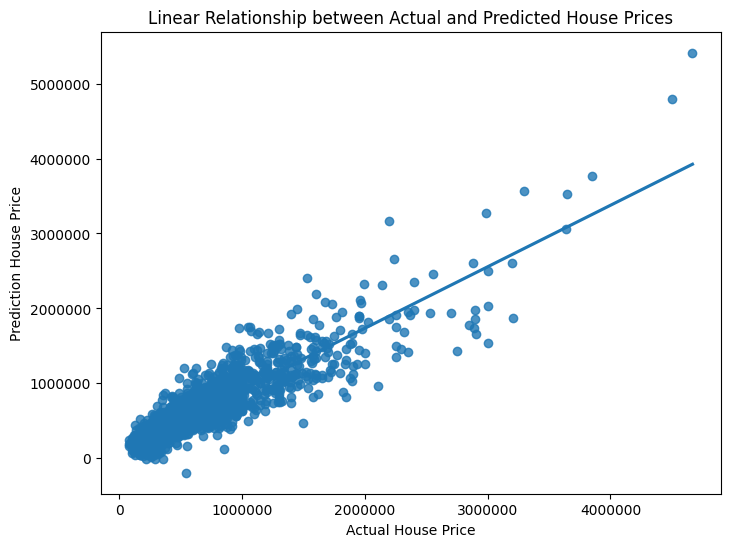

In [248]:
y_predict = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain')
ax = sns.regplot(x=y_test,y=y_predict, ci=None)
ax.set(xlabel ="Actual House Price", ylabel = "Prediction House Price", title ='Linear Relationship between Actual and Predicted House Prices')

The differences between actual and predicted house prices are normally distributed around zero (0), which is a positive indicator.

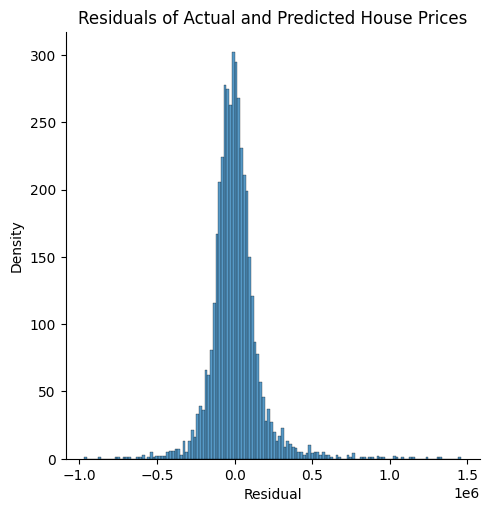

In [249]:
residual = y_test - y_predict

ax = sns.displot(residual)
ax.set(xlabel ="Residual", ylabel = "Density", title ='Residuals of Actual and Predicted House Prices')

The <b>R-squared (R<sup>2</sup>) of the model is 0.81</b>, which indicates that the model is able to capture most of the variation in the depedent variable.

NOTE: R<sup>2</sup> value ranges from 0 to 1. A higher value indicates a better fit of the model to the data.

In [250]:
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2): {round(r2, 2)}")

R-squared (R2): 0.81


The following are other metrics to evaluate the performance of the model.
- __Mean Absolute Error (MAE)__ measures the average absolute difference between the predicted and actual values of the dependent variable.
- __Mean Squared Error (MSE)__ measures the average of the squared differences between the predicted and actual values of the dependent variable.
- __Root Mean Squared Error (RMSE)__ is the square root of the MSE and measures the average magnitude of the errors between the predicted and actual values.

In [251]:
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")

mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {round(mse, 2)}")

rmse = mean_squared_error(y_test, y_predict, squared=False)
print(f"Root Mean Squared Error (RMSE): {round(rmse, 2)}")

Mean Absolute Error (MAE): 104137.47
Mean Squared Error (MSE): 25680513612.03
Root Mean Squared Error (RMSE): 160251.41


### Making Test Prediction

We will evaluate our model by utilizing it to estimate the price of the houses in King County, USA given the features.

In [252]:
from enum import Enum

class Feature(Enum):

    Bedrooms = 0
    Bathrooms = 1
    SqFtLiving = 2
    SqFtLot = 3
    Floors = 4
    Waterfront = 5
    View = 6
    Condition = 7
    Grade = 8
    SqFtAbove = 9  
    SqFtBasement = 10
    Latitude = 11
    Longitude = 12
    SqFtLiving15 = 13
    SqFtLot15 = 14
    HouseAge = 15


def getPrediction(input_data):
    df = np.array(input_data).reshape(1,-1)
    df = poly.transform(df)
    return model.predict(df)[0]


def testPrediction(input_data):

    print("------------------------------------------------------------------")
    print("                           HOUSE FEATURES                         ")
    print("------------------------------------------------------------------")
    for key, value in input_data.items():
        print(f"{key}: {value}")
    print("------------------------------------------------------------------")
    
    upd_input_data = [0] * (kc_house_df_filtered.columns.size - 1)

    upd_input_data[Feature.Bedrooms.value] = np.floor(input_data['Number of bedrooms'])
    upd_input_data[Feature.Bathrooms.value] = np.floor(input_data['Number of bathrooms'])
    upd_input_data[Feature.Floors.value] = np.floor(input_data['Number of floors'])
    upd_input_data[Feature.Waterfront.value] = 1 if input_data['Is overlooking the waterfront?'].lower() == 'yes' else 0
    
    upd_input_data[Feature.View.value] = input_data['View (rate from 1 to 4)']
    upd_input_data[Feature.Condition.value] = input_data['Condition (rate from 1 to 5)']
    upd_input_data[Feature.Grade.value] = input_data['Grade of construction and design (1-13)']

    upd_input_data[Feature.SqFtLot.value] = input_data['Land space (sq.ft.)']
    upd_input_data[Feature.SqFtLiving.value] = input_data['Interior living space (sq.ft.)']
    upd_input_data[Feature.SqFtAbove.value] = input_data['Interior housing space above ground level (sq.ft)']
    upd_input_data[Feature.SqFtBasement.value] = input_data['Interior housing space below ground level (sq.ft)']
    upd_input_data[Feature.SqFtLot15.value] = input_data['Land space of the nearest 15 neighbor']
    upd_input_data[Feature.SqFtLiving15.value] = input_data['Interior housing living space for the nearest 15 neighbors']

    upd_input_data[Feature.Latitude.value] = input_data['Latitude']
    upd_input_data[Feature.Longitude.value] = input_data['Longitude']

    year_built = input_data['Year the house was built']
    year_renovation = input_data['Year the house was renovated']
    upd_input_data[Feature.HouseAge.value] = (current_year - year_built) if year_renovation == 0 else (current_year - year_renovation)


    prediction = getPrediction(upd_input_data)

    print("\nActual price of the house: {:.2f}".format(input_data['Actual Price']))
    print("Predicted price of the house: {:.2f}".format(prediction))

__Test data #1__

In [256]:
input_data = {
    'Actual Price' : 3400000,
    'Number of bedrooms' : 4,
    'Number of bathrooms' : 4,
    'Number of floors' : 2,
    'Is overlooking the waterfront?' : 'Yes',
    'Year the house was built' : 1937,
    'Year the house was renovated' : 2010,
    'View (rate from 1 to 4)' : 0,
    'Condition (rate from 1 to 5)' : 3,
    'Grade of construction and design (1-13)' : 11,
    'Land space (sq.ft.)' : 11765,
    'Interior living space (sq.ft.)' : 4260,
    'Interior housing space above ground level (sq.ft)' : 3280,
    'Interior housing space below ground level (sq.ft)' : 980,
    'Latitude' : 47.638,
    'Longitude' : -122.288,
    'Land space of the nearest 15 neighbor' : 4260,
    'Interior housing living space for the nearest 15 neighbors' : 10408
}

testPrediction(input_data)

------------------------------------------------------------------
                           HOUSE FEATURES                         
------------------------------------------------------------------
Actual Price: 3400000
Number of bedrooms: 4
Number of bathrooms: 4
Number of floors: 2
Is overlooking the waterfront?: Yes
Year the house was built: 1937
Year the house was renovated: 2010
View (rate from 1 to 4): 0
Condition (rate from 1 to 5): 3
Grade of construction and design (1-13): 11
Land space (sq.ft.): 11765
Interior living space (sq.ft.): 4260
Interior housing space above ground level (sq.ft): 3280
Interior housing space below ground level (sq.ft): 980
Latitude: 47.638
Longitude: -122.288
Land space of the nearest 15 neighbor: 4260
Interior housing living space for the nearest 15 neighbors: 10408
------------------------------------------------------------------

Actual price of the house: 3400000.00
Predicted price of the house: 4161731.30


__Test data #2__

In [257]:
input_data = {
    'Actual Price' : 5110800,
    'Number of bedrooms' : 5,
    'Number of bathrooms' : 5,
    'Number of floors' : 2,
    'Is overlooking the waterfront?' : 'Yes',
    'Year the house was built' :1999,
    'Year the house was renovated' : 0,
    'View (rate from 1 to 4)' : 4,
    'Condition (rate from 1 to 5)' : 3,
    'Grade of construction and design (1-13)' : 12,
    'Land space (sq.ft.)' : 45517,
    'Interior living space (sq.ft.)' : 8010,
    'Interior housing space above ground level (sq.ft)' : 5990,
    'Interior housing space below ground level (sq.ft)' : 2020,
    'Latitude' : 47.6767,
    'Longitude' : -122.211,
    'Land space of the nearest 15 neighbor' : 26788,
    'Interior housing living space for the nearest 15 neighbors' : 3430
}

testPrediction(input_data)

------------------------------------------------------------------
                           HOUSE FEATURES                         
------------------------------------------------------------------
Actual Price: 5110800
Number of bedrooms: 5
Number of bathrooms: 5
Number of floors: 2
Is overlooking the waterfront?: Yes
Year the house was built: 1999
Year the house was renovated: 0
View (rate from 1 to 4): 4
Condition (rate from 1 to 5): 3
Grade of construction and design (1-13): 12
Land space (sq.ft.): 45517
Interior living space (sq.ft.): 8010
Interior housing space above ground level (sq.ft): 5990
Interior housing space below ground level (sq.ft): 2020
Latitude: 47.6767
Longitude: -122.211
Land space of the nearest 15 neighbor: 26788
Interior housing living space for the nearest 15 neighbors: 3430
------------------------------------------------------------------

Actual price of the house: 5110800.00
Predicted price of the house: 4961620.47


__Test data #3__

In [258]:
input_data = {
    'Actual Price' : 1095000,
    'Number of bedrooms' : 0,
    'Number of bathrooms' : 0,
    'Number of floors' : 3,
    'Is overlooking the waterfront?' : 'Yes',
    'Year the house was built' :1999,
    'Year the house was renovated' : 0,
    'View (rate from 1 to 4)' : 2,
    'Condition (rate from 1 to 5)' : 3,
    'Grade of construction and design (1-13)' : 7,
    'Land space (sq.ft.)' : 4764,
    'Interior living space (sq.ft.)' : 3064,
    'Interior housing space above ground level (sq.ft)' : 3064,
    'Interior housing space below ground level (sq.ft)' : 0,
    'Latitude' : 47.636,
    'Longitude' : -122.32,
    'Land space of the nearest 15 neighbor' : 4000,
    'Interior housing living space for the nearest 15 neighbors' : 2360
}

testPrediction(input_data)

------------------------------------------------------------------
                           HOUSE FEATURES                         
------------------------------------------------------------------
Actual Price: 1095000
Number of bedrooms: 0
Number of bathrooms: 0
Number of floors: 3
Is overlooking the waterfront?: Yes
Year the house was built: 1999
Year the house was renovated: 0
View (rate from 1 to 4): 2
Condition (rate from 1 to 5): 3
Grade of construction and design (1-13): 7
Land space (sq.ft.): 4764
Interior living space (sq.ft.): 3064
Interior housing space above ground level (sq.ft): 3064
Interior housing space below ground level (sq.ft): 0
Latitude: 47.636
Longitude: -122.32
Land space of the nearest 15 neighbor: 4000
Interior housing living space for the nearest 15 neighbors: 2360
------------------------------------------------------------------

Actual price of the house: 1095000.00
Predicted price of the house: 1226977.92


### Conclusions
- A Polynomial Regression algorithm with degree 2 is used to train and test a model that predicts house prices in King County, USA. The model yields a score of 0.81 for both train and test datasets, which is an indication of good performance.
- The differences between actual and predicted house prices are normally distributed around zero (0), which is a positive indicator.
- The model has an R-squared (R<sup>2</sup>) of 0.81, which indicates that the model is able to capture most of the variation in the depedent variable.

### References

1. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
2. https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
3. https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604
4. https://medium.com/bitgrit-data-science-publication/10-tips-to-improve-your-regression-modeling-f1af297c505a
5. https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
6. https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8 
7. https://www.mishrark.com/machine-learning/3-regression/simple-linear-regression-in-python


> BDM-1034 Winter 2023 Mid-Term Project (Group 7)